In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
from sklearn.metrics import pairwise_distances
sns.set(style="whitegrid")

In [3]:
from DataProvider import DataProvider
from Visualizer import Visualizer
from Clusterer import Clusterer
from ClustererAgg import ClustererAgg

In [54]:
hamburg="test-data/27_teams_3ce786ba.json"
mainz_alt="test-data/36_teams_5a005256.json"
mainz_complete="test-data/45_teams_b17d628f.json"

data = DataProvider(mainz_complete)
routes = data.get_routes()
dist_matrix = data.get_distance_matrix()
agg_cluster = ClustererAgg(routes, dist_matrix, data.get_cluster_sizes())

dist_percentiles = data.get_distance_percentiles()
print(dist_percentiles)

#print(data.get_cluster_template())

{50: np.float64(1471.2210021278713), 70: np.float64(2583.900140874688), 75: np.float64(3036.3617304052186), 80: np.float64(3654.757106562651), 90: np.float64(5968.367336202575), 95: np.float64(6776.936351088109), 99: np.float64(15030.71681782411)}


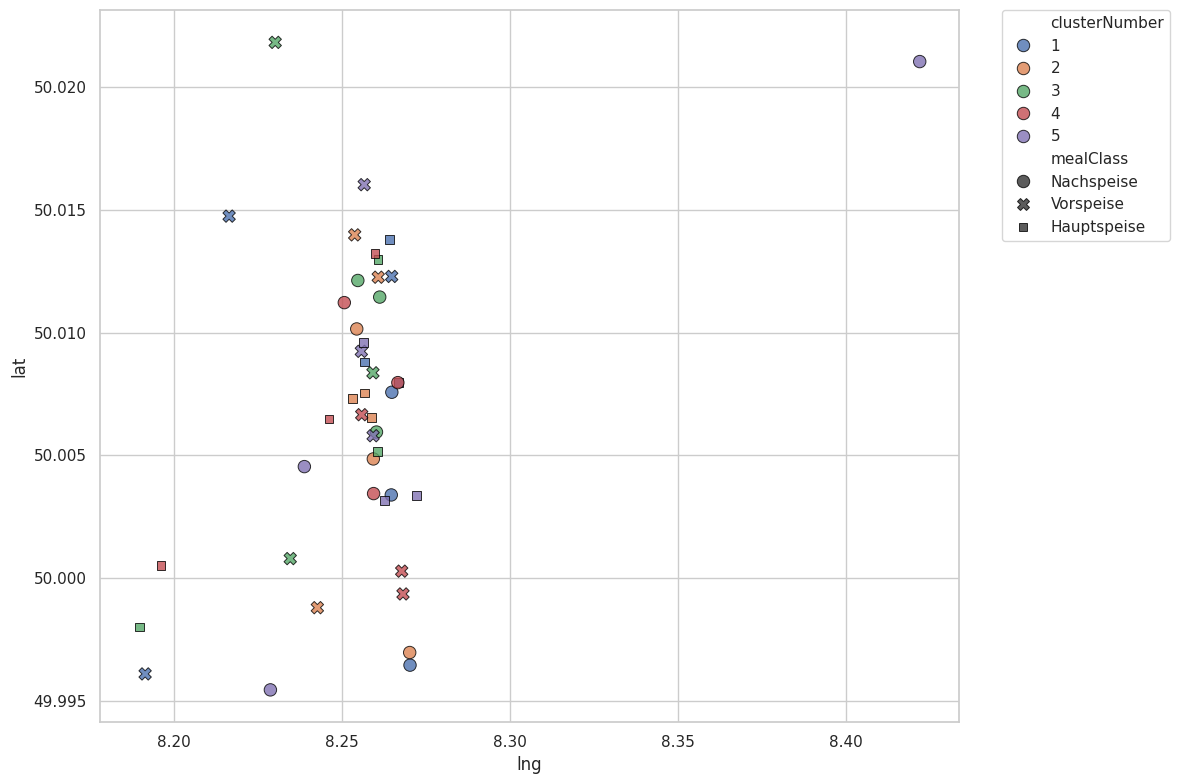

Cluster 1: 9 Elemente, maximale Distanz: 6682.72
Cluster 2: 9 Elemente, maximale Distanz: 2733.00
Cluster 3: 9 Elemente, maximale Distanz: 6338.97
Cluster 4: 9 Elemente, maximale Distanz: 6206.50
Cluster 5: 9 Elemente, maximale Distanz: 17163.29


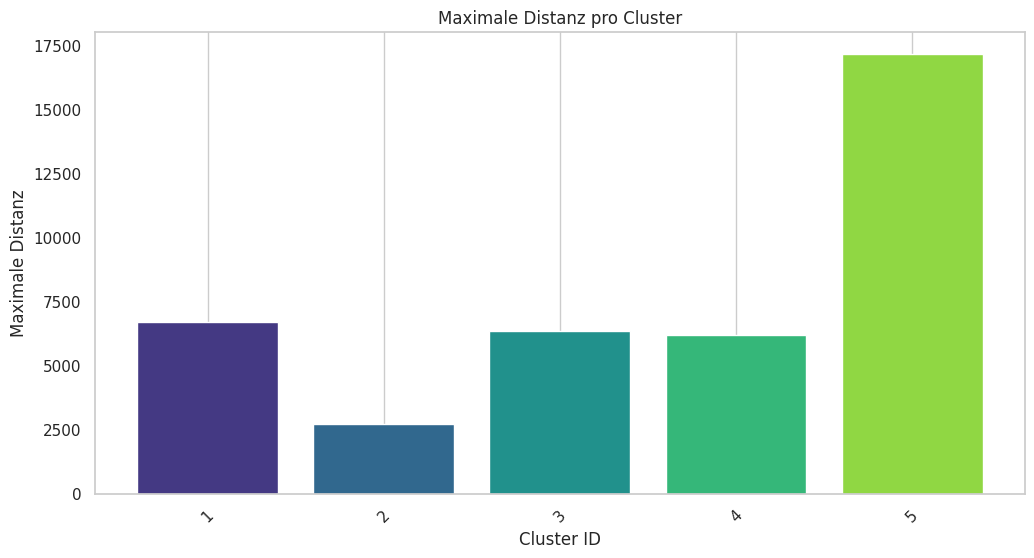

In [55]:
vis = Visualizer(routes, dist_matrix)
vis.plot_geocodes()
vis.plot_max_distances_per_cluster(agg_cluster.print_max_distances_per_cluster(routes))

[0 0 0 1 0 0 0 4 0 0 0 0 2 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 4 0 0 0 0 0 0 4 2
 2 0 0 2 0 0 3 0]


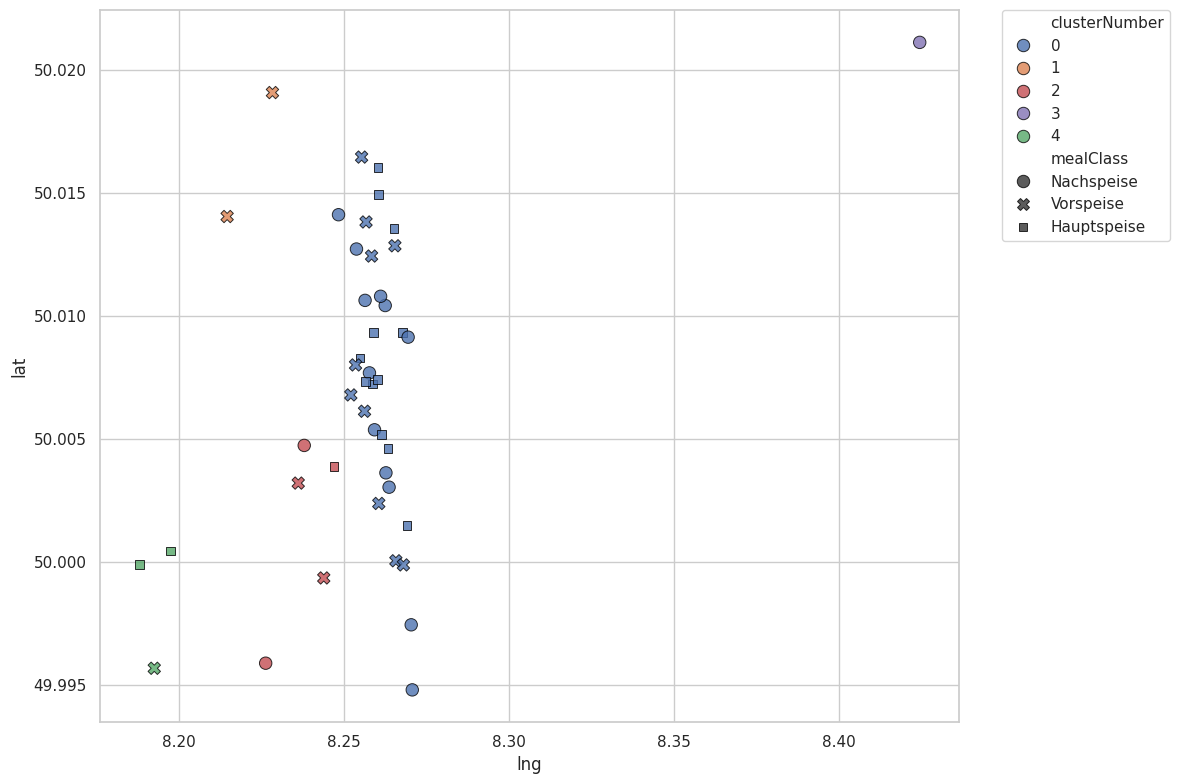

Cluster 0: 34 Elemente, maximale Distanz: 2839.03
Cluster 1: 2 Elemente, maximale Distanz: 1385.70
Cluster 2: 5 Elemente, maximale Distanz: 2093.62
Cluster 3: nur 1 Element
Cluster 4: 3 Elemente, maximale Distanz: 679.25


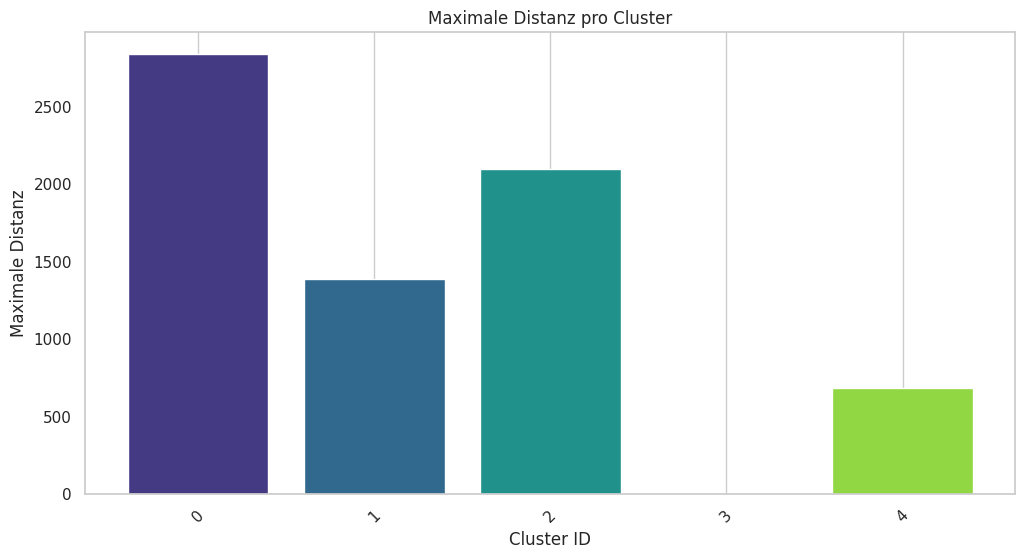

In [56]:
#n_clusters=3
#distance_threshold=7000
##distance_threshold=1000
agg_routes, agg_labels = agg_cluster.predict(n_clusters=len(data.get_cluster_sizes()))#distance_threshold=dist_percentiles[80])
print (agg_labels)
vis_agg = Visualizer(agg_routes, dist_matrix)
vis_agg.plot_geocodes()
vis_agg.plot_max_distances_per_cluster(agg_cluster.print_max_distances_per_cluster(agg_routes))

In [57]:
agg_routes, agg_labels = agg_cluster.greedy_balance_clusters(data.get_cluster_template())

{np.int64(0): {0, 1, 2, 4, 5, 6, 8, 9, 10, 11, 13, 14, 15, 16, 18, 19, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 38, 39, 41, 42, 44}, np.int64(1): {3, 22}, np.int64(2): {36, 37, 40, 12, 17}, np.int64(3): {43}, np.int64(4): {35, 28, 7}}

********* CLUSTER 0 *********
Current cluster 0 has 34 points.
Current meal classes in cluster 0:
0      Nachspeise
1      Nachspeise
2      Nachspeise
4       Vorspeise
5      Nachspeise
6     Hauptspeise
8      Nachspeise
9      Nachspeise
10    Hauptspeise
11    Hauptspeise
13      Vorspeise
14      Vorspeise
15    Hauptspeise
16    Hauptspeise
18     Nachspeise
19     Nachspeise
20     Nachspeise
21    Hauptspeise
23     Nachspeise
24      Vorspeise
25      Vorspeise
26    Hauptspeise
27     Nachspeise
29      Vorspeise
30      Vorspeise
31      Vorspeise
32      Vorspeise
33    Hauptspeise
34     Nachspeise
38    Hauptspeise
39      Vorspeise
41    Hauptspeise
42    Hauptspeise
44    Hauptspeise
Name: mealClass, dtype: object
Required mea

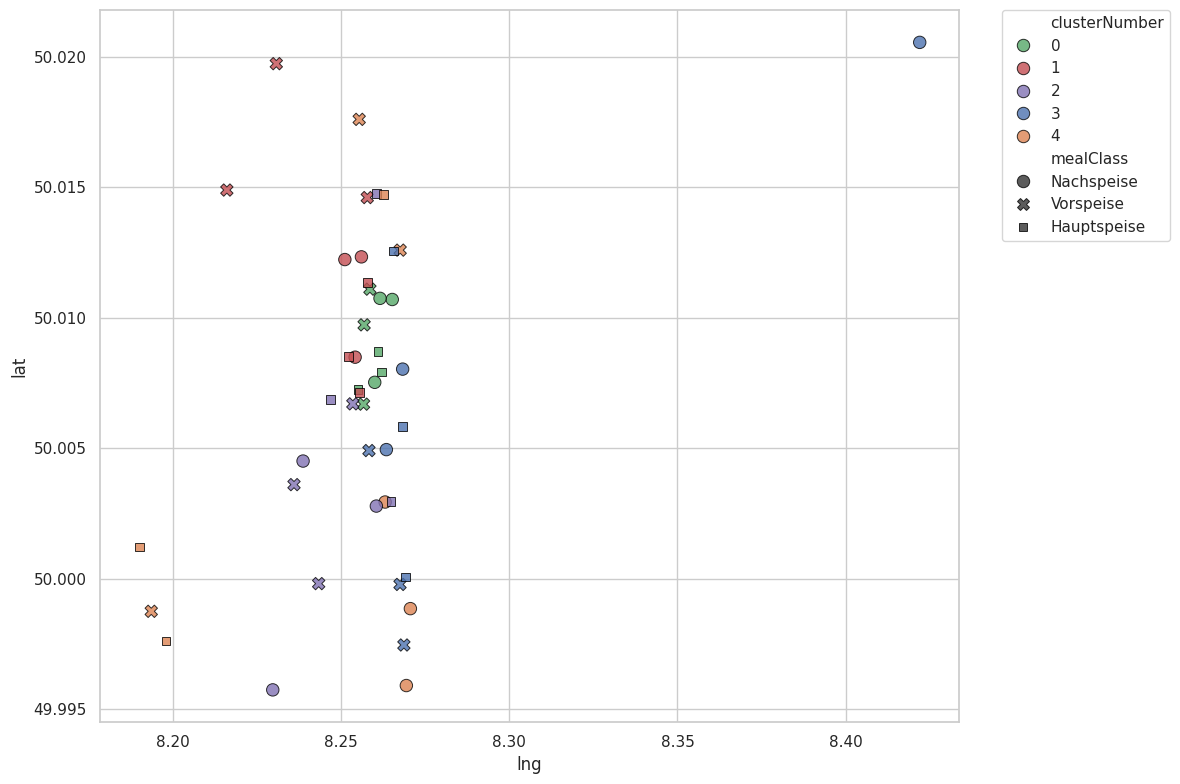

Cluster 0: 9 Elemente, maximale Distanz: 777.81
Cluster 1: 9 Elemente, maximale Distanz: 3755.66
Cluster 2: 9 Elemente, maximale Distanz: 3547.83
Cluster 3: 9 Elemente, maximale Distanz: 14332.16
Cluster 4: 9 Elemente, maximale Distanz: 6848.95


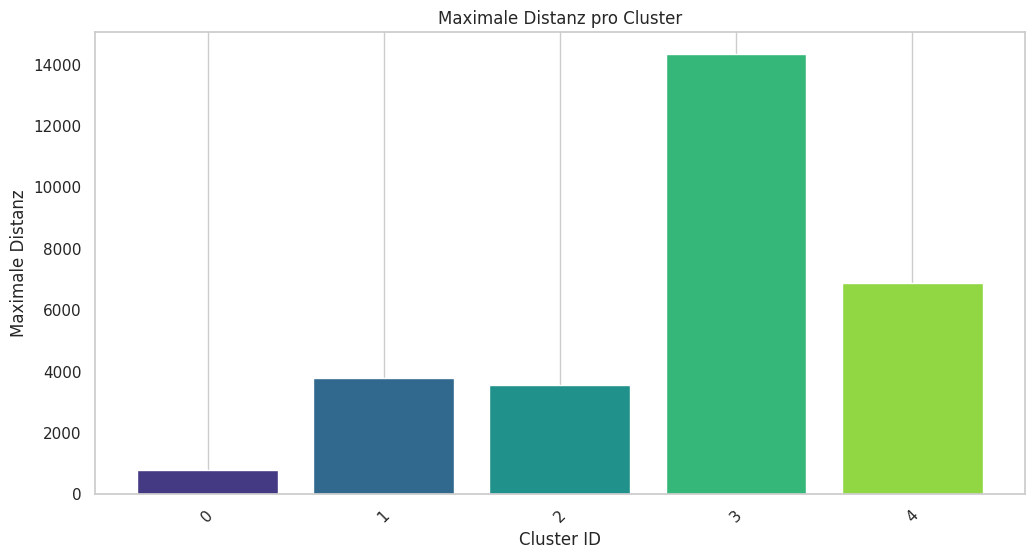

In [58]:
vis_agg = Visualizer(agg_routes, dist_matrix)
vis_agg.plot_geocodes()
vis_agg.plot_max_distances_per_cluster(agg_cluster.print_max_distances_per_cluster(agg_routes))